<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1129625792.33811128438995.36621130354369.

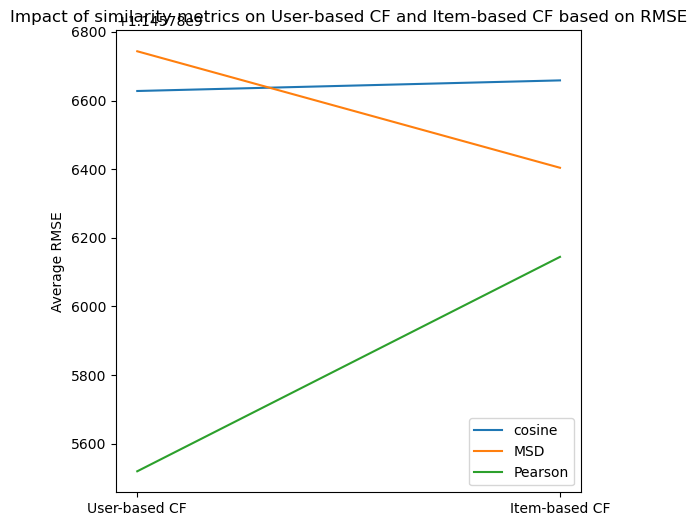

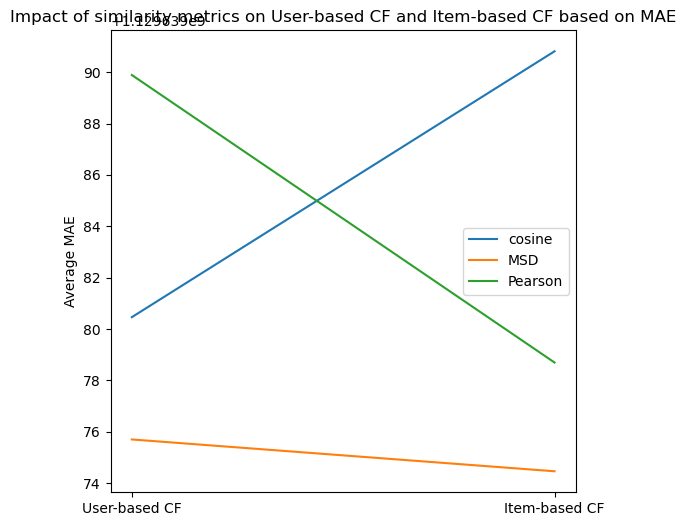

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

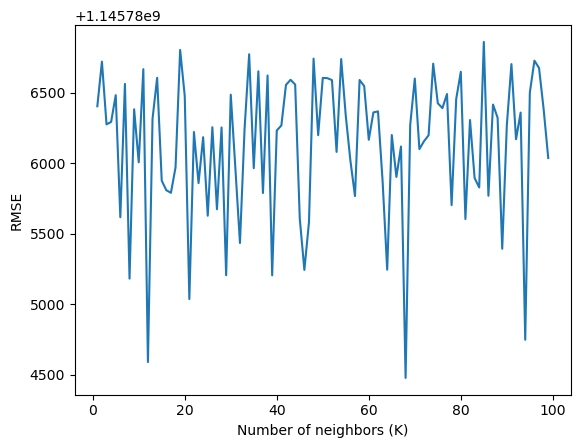

Best K for User-based CF: 68
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd simi

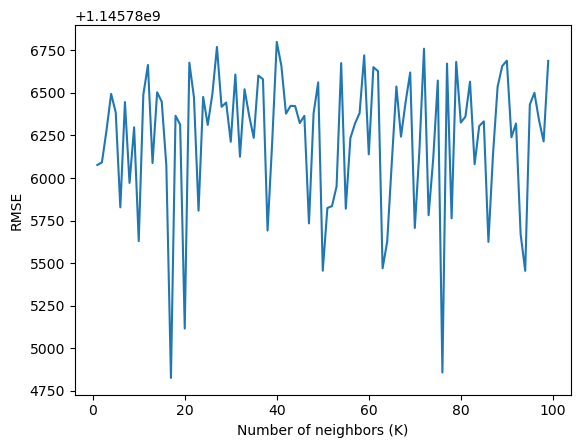

Best K for item-based CF: 17
Best k for User-based CF: 68


In [1]:
import sys
!{sys.executable} -m pip install scikit-surprise

import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

mv_rating_data = pd.read_csv('/Users/maniroop/Downloads/ratings_small.csv', delimiter = ',')
mv_rating_data.info()

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(mv_rating_data[['userId', 'movieId', 'timestamp']], reader)

mv_rating_data.info()

mv_rating_data.head()

from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

pmf = SVD(biased=True)
ubcf = KNNBasic(sim_options={'user_based': True})
ibcf = KNNBasic(sim_options={'user_based': False})

pmf_results = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
pmf_results_df = pd.DataFrame.from_dict(pmf_results)
ubcf_results = cross_validate(ubcf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
ubcf_results_df = pd.DataFrame.from_dict(ubcf_results)
ibcf_results = cross_validate(ibcf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
ibcf_results_df = pd.DataFrame.from_dict(ibcf_results)

pmf_results_df

pmf_mae = pmf_results_df['test_mae'].mean()
pmf_rmse = pmf_results_df['test_rmse'].mean()
ubcf_mae = ubcf_results_df['test_mae'].mean()
ubcf_rmse = ubcf_results_df['test_rmse'].mean()
ibcf_mae = ibcf_results_df['test_mae'].mean()
ibcf_rmse = ibcf_results_df['test_rmse'].mean()

print('PMF average MAE:', pmf_mae)
print('PMF average RMSE:', pmf_rmse)
print('UBCF average MAE:', ubcf_mae)
print('UBCF average RMSE:', ubcf_rmse)
print('IBCF average MAE:', ibcf_mae)
print('IBCF average RMSE:', ibcf_rmse)

# Question E

models = {'User-based CF (cosine)': KNNBasic(sim_options={'name': 'cosine', 'user_based': True}),
          'User-based CF (MSD)': KNNBasic(sim_options={'name': 'msd', 'user_based': True}),
          'User-based CF (Pearson)': KNNBasic(sim_options={'name': 'pearson', 'user_based': True}),
          'Item-based CF (cosine)': KNNBasic(sim_options={'name': 'cosine', 'user_based': False}),
          'Item-based CF (MSD)': KNNBasic(sim_options={'name': 'msd', 'user_based': False}),
          'Item-based CF (Pearson)': KNNBasic(sim_options={'name': 'pearson', 'user_based': False})}

results_rmse = {}
results_mae = {}
for model_name, model in models.items():
    sim_metric = model_name.split('(')[-1][:-1]
    print('Model:', model_name)
    model_results = cross_validate(model, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    results_rmse[(sim_metric, model_name.split('(')[0])] = sum(model_results['test_rmse']) / 5
    results_mae[(sim_metric, model_name.split('(')[0])] = sum(model_results['test_mae']) / 5
    
results_mae

results_rmse

fig, ax = plt.subplots(figsize=(6, 6))
for sim_metric in ['cosine', 'MSD', 'Pearson']:
    #txt1 = '\'' + sim_metric + '\', \'User-based CF \''
    ax.plot([results_rmse[(sim_metric, 'User-based CF ')], results_rmse[(sim_metric, 'Item-based CF ')]],
            label=sim_metric)
ax.set_xticks([0, 1])
ax.set_xticklabels(['User-based CF', 'Item-based CF'])
ax.set_ylabel('Average RMSE')
ax.set_title('Impact of similarity metrics on User-based CF and Item-based CF based on RMSE')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
for sim_metric in ['cosine', 'MSD', 'Pearson']:
    #txt1 = '\'' + sim_metric + '\', \'User-based CF \''
    ax.plot([results_mae[(sim_metric, 'User-based CF ')], results_mae[(sim_metric, 'Item-based CF ')]],
            label=sim_metric)
ax.set_xticks([0, 1])
ax.set_xticklabels(['User-based CF', 'Item-based CF'])
ax.set_ylabel('Average MAE')
ax.set_title('Impact of similarity metrics on User-based CF and Item-based CF based on MAE')
ax.legend()
plt.show()

sim_options = {'user_based': True}
rmse_results_ub = []
for k in range(1, 100):
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_results_ub.append(cv_results['test_rmse'].mean())
    
plt.plot(range(1, 100), rmse_results_ub)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('RMSE')
plt.show()

best_k = rmse_results_ub.index(min(rmse_results_ub)) + 1
print('Best K for User-based CF:', best_k)

sim_options = {'user_based': False}
rmse_results_ib = []
for k in range(1, 100):
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_results_ib.append(cv_results['test_rmse'].mean())
    
plt.plot(range(1, 100), rmse_results_ib)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('RMSE')
plt.show()

best_k = rmse_results_ib.index(min(rmse_results_ib)) + 1
print('Best K for item-based CF:', best_k)
print ('Best k for User-based CF:', rmse_results_ub.index(min(rmse_results_ub)) + 1 )